In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Read the CSV file into a DataFrame
df = pd.read_csv('bug.csv')

df


,bug,status,detail,time
0,458763,introduced,NaN,2015-01-29T17:37:03Z
1,426001,introduced,NaN,2014-01-17T16:05:01Z
2,426002,introduced,NaN,2014-01-17T16:16:28Z
3,426004,introduced,NaN,2014-01-17T16:27:16Z
4,491541,introduced,NaN,2016-04-12T19:23:34Z
...,...,...,...,...
76166,425982,UPDATE,DUPLICATE,2014-01-28T13:14:29Z
76167,425982,REOPENED,NaN,2014-01-28T14:38:23Z
76168,425982,UPDATE,NaN,2014-01-28T14:38:23Z
76169,425982,RESOLVED,NaN,2014-04-16T11:12:34Z


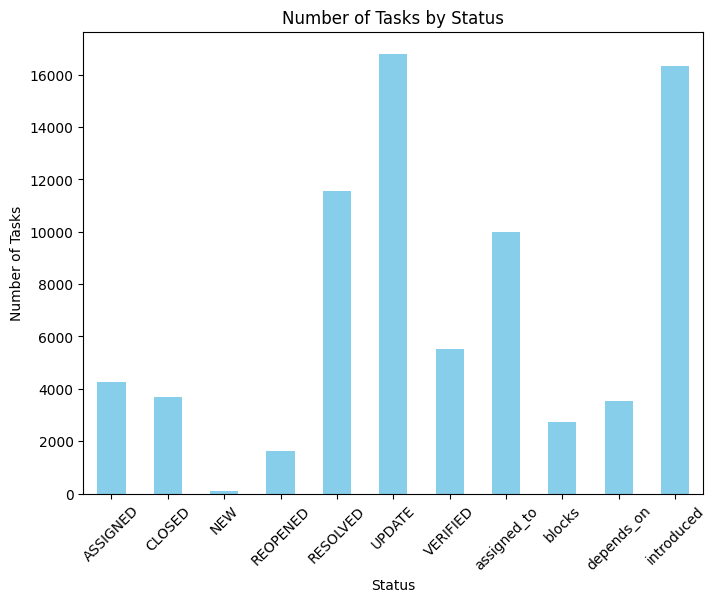

In [13]:
status_counts = df.groupby('status').size()

# Plot the counts
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tasks by Status')
plt.xlabel('Status')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.show()

In [14]:
status_counts

status
ASSIGNED        4261
CLOSED          3704
NEW              102
REOPENED        1614
RESOLVED       11546
UPDATE         16807
VERIFIED        5521
assigned_to     9994
blocks          2731
depends_on      3549
introduced     16342
dtype: int64

In [5]:
df.isnull()

,bug,status,detail,time
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
76166,False,False,False,False
76167,False,False,True,False
76168,False,False,True,False
76169,False,False,True,False


In [9]:
df.dropna(inplace=True)

In [11]:
df.describe()

,bug
count,31471.000000
mean,446181.470592
std,85250.276356
min,5188.000000
25%,386940.000000
50%,453648.000000
75%,522726.000000
max,565782.000000


In [23]:
assigned_tasks = df[df["status"]=="assigned_to"]
assigned_tasks

,bug,status,detail,time
16342,458763,assigned_to,noopur_gupta@in.ibm.com,2015-02-19T10:46:45Z
16346,426001,assigned_to,jdt-ui-inbox@eclipse.org,2014-01-17T16:07:15Z
16350,426002,assigned_to,jdt-ui-inbox@eclipse.org,2014-01-17T16:19:54Z
16353,426004,assigned_to,jdt-ui-inbox@eclipse.org,2014-01-17T17:55:34Z
16356,491541,assigned_to,kenneth@kean.nu,2019-10-31T16:34:42Z
...,...,...,...,...
76145,327654,assigned_to,satyam.kandula@in.ibm.com,2010-10-13T12:17:22Z
76153,393192,assigned_to,jesper@selskabet.org,2013-03-01T17:20:13Z
76159,491504,assigned_to,manpalat@in.ibm.com,2016-04-18T06:52:57Z
76162,458739,assigned_to,jdt-text-inbox@eclipse.org,2015-07-23T13:40:12Z


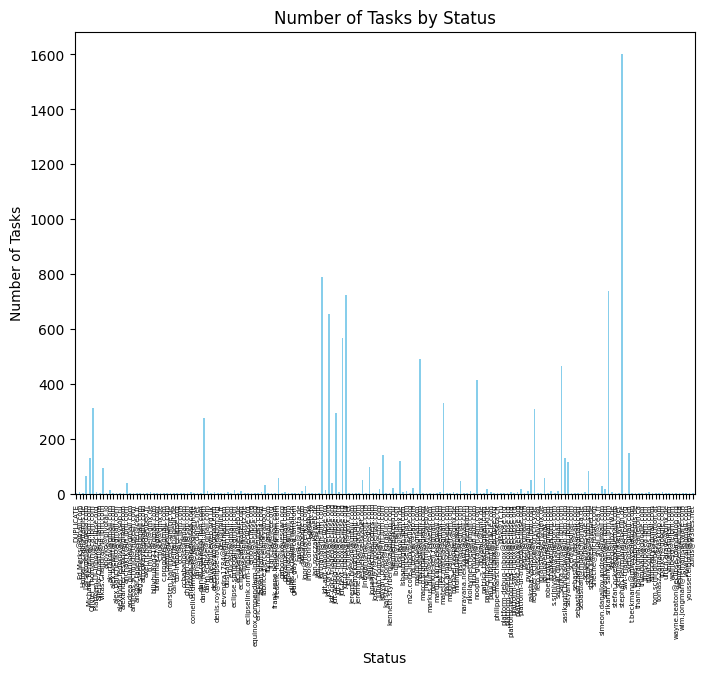

In [29]:
B

In [31]:
assigned_tasks = df[df["status"]=="UPDATE"]
assigned_tasks

,bug,status,detail,time
16344,458763,UPDATE,FIXED,2015-04-28T09:12:05Z
16349,426001,UPDATE,DUPLICATE,2016-06-16T11:21:38Z
16352,426002,UPDATE,WORKSFORME,2014-01-20T11:29:46Z
16357,491541,UPDATE,FIXED,2019-11-05T07:29:02Z
16366,360468,UPDATE,WONTFIX,2020-07-20T20:00:28Z
...,...,...,...,...
76158,491504,UPDATE,FIXED,2016-04-18T06:52:57Z
76163,458739,UPDATE,DUPLICATE,2015-07-23T13:40:12Z
76166,425982,UPDATE,DUPLICATE,2014-01-28T13:14:29Z
76168,425982,UPDATE,NaN,2014-01-28T14:38:23Z


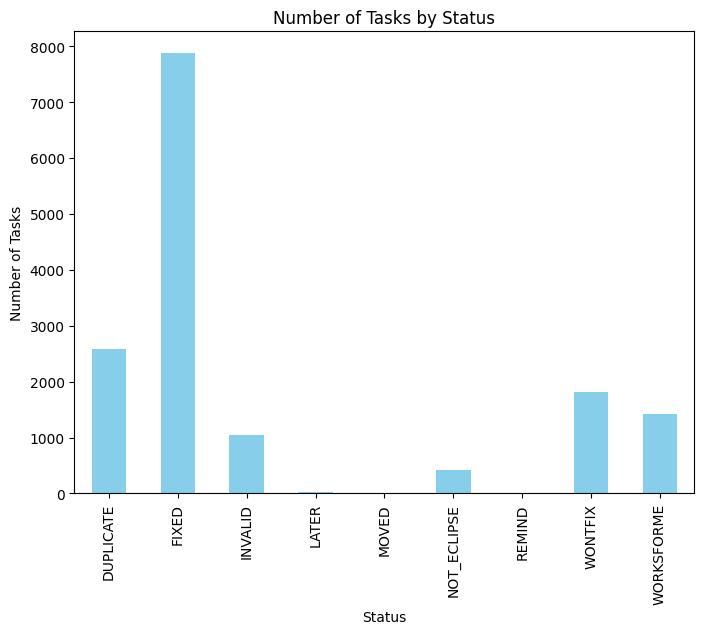

In [33]:
status_counts = assigned_tasks.groupby('detail').size()

# Plot the counts
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tasks by Status')
plt.xlabel('Status')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [46]:
assigned_tasks = df[df["status"]=="depends_on"]
assigned_tasks

,bug,status,detail,time
16390,426025,depends_on,433717,2014-05-21T19:49:51Z
16400,426025,depends_on,465456,2016-06-03T13:26:02Z
16453,458852,depends_on,432049,2015-02-02T10:23:04Z
16454,458852,depends_on,441016,2015-02-02T10:23:04Z
16505,360588,depends_on,369856,2012-01-26T23:51:33Z
...,...,...,...,...
75850,392946,depends_on,397888,2013-01-11T13:16:46Z
75974,327497,depends_on,368212,2012-11-22T21:54:12Z
76013,360317,depends_on,360164,2011-10-08T13:28:05Z
76076,393143,depends_on,401878,2013-02-27T11:14:39Z


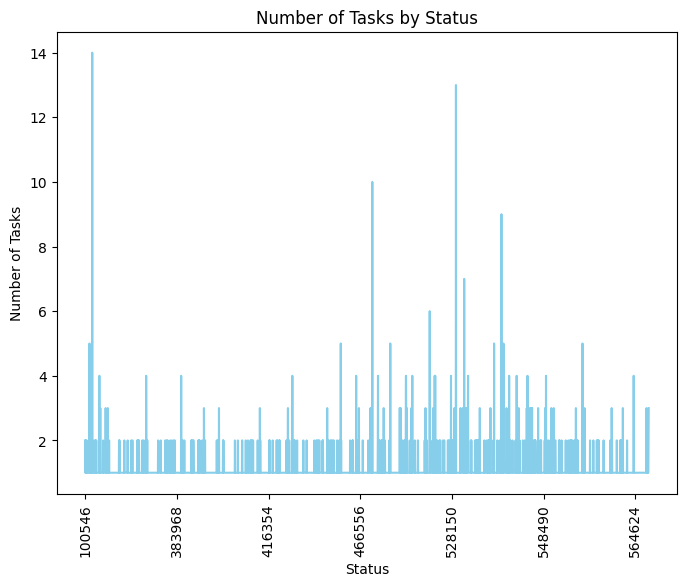

In [47]:
status_counts = assigned_tasks.groupby('detail').size()

# Plot the counts
plt.figure(figsize=(8, 6))
status_counts.plot( color='skyblue')
plt.title('Number of Tasks by Status')
plt.xlabel('Status')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [48]:
assigned_tasks = df[df["status"]=="blocks"]
assigned_tasks

,bug,status,detail,time
16362,360468,blocks,387126,2015-10-30T12:55:20Z
16363,360468,blocks,109670,2016-05-19T14:49:21Z
16387,491558,blocks,481796,2016-08-27T07:16:13Z
16389,426025,blocks,427950,2014-02-11T23:33:44Z
16391,426025,blocks,459412,2015-02-09T17:04:38Z
...,...,...,...,...
75879,425741,blocks,417937,2014-01-15T20:29:50Z
75930,491308,blocks,5188,2016-04-08T11:08:40Z
75944,491311,blocks,5188,2016-04-08T11:08:28Z
75981,458577,blocks,458201,2015-01-27T20:51:01Z


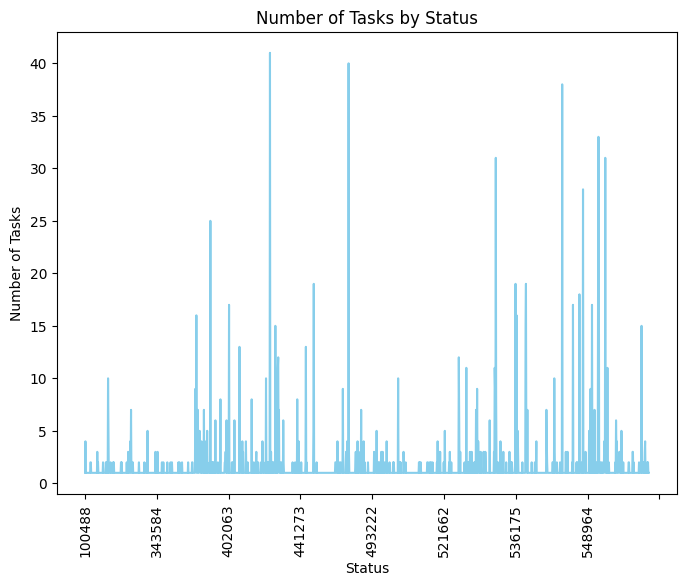

In [49]:
status_counts = assigned_tasks.groupby('detail').size()

# Plot the counts
plt.figure(figsize=(8, 6))
status_counts.plot(color='skyblue')
plt.title('Number of Tasks by Status')
plt.xlabel('Status')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=90,fontsize=10)
plt.show()